In [6]:
### PREREQUIRMENTS
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [7]:
study_arm_subject = pd.read_csv('tables/study_arm_subject.csv') # duplicates (probably bc of different AGE_EVENTS)
lab_tests = pd.read_csv('tables/lab_tests.csv')

/tmp/ipykernel_81971/2795248546.py:2: DtypeWarning: Columns (2,8,10,11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  lab_tests = pd.read_csv('tables/lab_tests.csv')


In [8]:
### manually assigned by oreferred names -> macht kein sinn weil da extrem viele nans sind-..
#### ASSIGNEMENT BY PANEL_NAMES

def is_test_per_panel(panel_names, df):
    return {entry: df['PANEL_NAME'].value_counts().get(entry, 0) for entry in panel_names}
### cell types
cell_type_PANEL_NAMEs = [
    'Blood Cell Count: ',
    'Blood Cell Count with Differential: ',
    'Blood cell counts: ',
    'CBC: ',
    'CBC/Differential Results: ',
    'CBC_DIFFERENTIAL: ',
    'CBC_Results: ',
    'Complete Blood Cell Count: ',
    'Complete blood count: ',
    'DIFFERENTIAL: ',
    'HEMATOLOGY: ',
    'Hematology: ',
    'Hematology test: ',
]

cell_types_PANEL_NAMEs_trimmed = [x[:-2] for x in cell_type_PANEL_NAMEs] ## trim the bins names as i added glutter to have it nicer... 
cell_types_all_tests = lab_tests[lab_tests['PANEL_NAME'].isin(cell_types_PANEL_NAMEs_trimmed)]
print(is_test_per_panel(cell_types_PANEL_NAMEs_trimmed, lab_tests))


### biomarkers
biomarker_PANEL_NAMEs = [
    'Blood Flow Cytometry: ',
    'Protein or Enzyme Type Measurement: ',
    ]
biomarker_PANEL_NAMEs_trimmed = [x[:-2] for x in biomarker_PANEL_NAMEs] ## trim the bins names as i added glutter to have it nicer... 
biomarker_all_tests = lab_tests[lab_tests['PANEL_NAME'].isin(biomarker_PANEL_NAMEs_trimmed)]
print(is_test_per_panel(biomarker_PANEL_NAMEs_trimmed, lab_tests))
biomarker_all_studies_array = biomarker_all_tests['STUDY_ACCESSION'].unique()
biomarker_all_studies = study_arm_subject[study_arm_subject['STUDY_ACCESSION'].isin(biomarker_all_studies_array)]


# ### Fasting
fasting_PANEL_NAMEs = [
    'FASTING_BLOOD_CHEMISTRY: ',
    'Fasting Lipid Panel: ',
    'Fasting Lipid Profile: ',
    'Fasting Lipids: '
]
fasting_PANEL_NAMEs_trimmed = [x[:-2] for x in fasting_PANEL_NAMEs] ## trim the bins names as i added glutter to have it nicer... 
fasting_all_tests = lab_tests[lab_tests['PANEL_NAME'].isin(fasting_PANEL_NAMEs_trimmed)]
print(is_test_per_panel(fasting_PANEL_NAMEs_trimmed, lab_tests))


# ### antigens
antigens_PANEL_NAMEs = [
    'Basophil: ',
    'Immunology Test: ',
    'Serum Protein Electrophoresis: '
]
antigens_PANEL_NAMEs_trimmed = [x[:-2] for x in antigens_PANEL_NAMEs] ## trim the bins names as i added glutter to have it nicer... 
antigens_all_tests = lab_tests[lab_tests['PANEL_NAME'].isin(antigens_PANEL_NAMEs_trimmed)]
print(is_test_per_panel(antigens_PANEL_NAMEs_trimmed, lab_tests))

# ### chemistry
chemistry_PANEL_NAMEs=[
    'BASIC_CHEMISTRY: ',
    'BLOOD_CHEMISTRY: ',
    'Blood Chemistry: ',
    'Blood Chemistry Measurement: ',
    'Blood Chemistry Test: ',
    'Chemistry Test: ',
    'Clinical Chemistry: ',
    'Comprehensive Metabolic Panel: ',
    'Hematology: ',
    'Serum Chemistry: '
]
chemistry_PANEL_NAMEs_trimmed = [x[:-2] for x in chemistry_PANEL_NAMEs] ## trim the bins names as i added glutter to have it nicer... 
chemistry_all_tests = lab_tests[lab_tests['PANEL_NAME'].isin(chemistry_PANEL_NAMEs_trimmed)]
print(is_test_per_panel(chemistry_PANEL_NAMEs_trimmed, lab_tests))


# ### creatinin
# Creatinine test: 
# Protein or Enzyme Type Measurement: 

# SERUM_CREATININE: 


# ### other

# ### urea
# Urinalysis: 
# Urine

# ### liver
# LIVER_PANEL: 


{'Blood Cell Count': 102145, 'Blood Cell Count with Differential': 116550, 'Blood cell counts': 504, 'CBC': 13029, 'CBC/Differential Results': 396, 'CBC_DIFFERENTIAL': 1348, 'CBC_Results': 32307, 'Complete Blood Cell Count': 1100, 'Complete blood count': 7076, 'DIFFERENTIAL': 849, 'HEMATOLOGY': 16982, 'Hematology': 111299, 'Hematology test': 95230}
{'Blood Flow Cytometry': 391, 'Protein or Enzyme Type Measurement': 11734}
{'FASTING_BLOOD_CHEMISTRY': 6418, 'Fasting Lipid Panel': 236, 'Fasting Lipid Profile': 11240, 'Fasting Lipids': 1423}
{'Basophil': 36456, 'Immunology Test': 77439, 'Serum Protein Electrophoresis': 180}
{'BASIC_CHEMISTRY': 6777, 'BLOOD_CHEMISTRY': 22128, 'Blood Chemistry': 130268, 'Blood Chemistry Measurement': 1385, 'Blood Chemistry Test': 924, 'Chemistry Test': 86651, 'Clinical Chemistry': 8912, 'Comprehensive Metabolic Panel': 179780, 'Hematology': 111299, 'Serum Chemistry': 49381}


In [22]:
def create_directory(directory_path):
    try:
        os.makedirs(directory_path, exist_ok=True)
        print(f"Directory '{directory_path}' created successfully.")
    except OSError as error:
        print(f"Creation of the directory '{directory_path}' failed. Error: {error}")


def violinplot_overall(df, x_topic='GENDER', y_topic='MAX_SUBJECT_AGE_IN_YEARS', hue_split='GENDER', bin_name='test_bin'):
    sns.violinplot(x=x_topic, y=y_topic, hue=hue_split, data=df[[x_topic, y_topic]], split=True)
    plt.savefig(f'{bin_name}/violin_overall.png')
    

def violinplot_per_criteria(df, x_topic='STUDY_ACCESSION', y_topic='MAX_SUBJECT_AGE_IN_YEARS', hue_split='GENDER', bin_name='test_bin'):
    plt.figure(figsize=(len(df[x_topic].unique()) * 1.5, 6))
    sns.violinplot(x=x_topic, y=y_topic, hue=hue_split, data=df[[x_topic, hue_split, y_topic]], split=True, cut=0.5, inner=None)
    plt.xticks(rotation=45)
    plt.axhline(y=0)
    plt.tick_params(axis='y', bottom=True)
    plt.savefig(f'{bin_name}/violin_per_{x_topic}.png')


def create_bin_report(tests_df, bin_name='TEST'):
    create_directory(bin_name)
    to_write_array = []
    studies_unique = tests_df['STUDY_ACCESSION'].unique()
    print(f'Studies for {bin_name}: {len(studies_unique)}')
    to_write_array.append(f'Amount studies: {len(studies_unique)}')
    
    all_studies = study_arm_subject[study_arm_subject['STUDY_ACCESSION'].isin(studies_unique)]
    bin_study_arm_subject = study_arm_subject[study_arm_subject['STUDY_ACCESSION'].isin(all_studies['STUDY_ACCESSION'])]
    bin_study_arm_subject_no_douplicates = bin_study_arm_subject.drop_duplicates('SUBJECT_ACCESSION')
    print(f'Amount of Subjects: {bin_study_arm_subject.shape[0]}')
    to_write_array.append(f'Amount subjects: {bin_study_arm_subject.shape[0]}')
    print(f'Amount of Subjects no duplicates: {bin_study_arm_subject_no_douplicates.shape[0]}')
    to_write_array.append(f'Amount subjects no douplicates: {bin_study_arm_subject_no_douplicates.shape[0]}')
    with open(f'{bin_name}/report.txt', 'w') as file:
        for item in to_write_array:
            file.write(f"{item}\n")
        
    # here i´d like to create a bunch of violinplots in a folder
    violinplot_overall(bin_study_arm_subject_no_douplicates, 'GENDER', 'MAX_SUBJECT_AGE_IN_YEARS', 'GENDER', bin_name)
    violinplot_per_criteria(bin_study_arm_subject_no_douplicates,  'STUDY_ACCESSION', 'MAX_SUBJECT_AGE_IN_YEARS', 'GENDER', bin_name)

    print(f'Age event: {len(bin_study_arm_subject_no_douplicates["AGE_EVENT"].unique())}')
    to_write_array.append(f'Age events: {len(bin_study_arm_subject_no_douplicates["AGE_EVENT"].unique())}')
    violinplot_per_criteria(bin_study_arm_subject_no_douplicates,  'AGE_EVENT', 'MAX_SUBJECT_AGE_IN_YEARS', 'GENDER', bin_name)
    return bin_study_arm_subject_no_douplicates


        

Directory 'Biomarker' created successfully.
Studies for Biomarker: 14
Amount of Subjects: 2577
Amount of Subjects no duplicates: 2577
Age event: 4


,Unnamed: 0,ARM_ACCESSION,SUBJECT_ACCESSION,AGE_EVENT,AGE_EVENT_SPECIFY,AGE_UNIT,MAX_SUBJECT_AGE,MIN_SUBJECT_AGE,SUBJECT_PHENOTYPE,SUBJECT_LOCATION,...,SPECIES,STRAIN,STRAIN_CHARACTERISTICS,WORKSPACE_ID_x,DESCRIPTION_y,NAME,STUDY_ACCESSION,TYPE_REPORTED,TYPE_PREFERRED,WORKSPACE_ID_y
22066,22066,ARM2707,SUB151307,Age at initial treatment,NaN,Years,7.0,7.0,NaN,NaN,...,Homo sapiens,NaN,NaN,4117,"3 cycles, six months apart, each consisting o...",hOKT3gamma1 (Ala-Ala) (teplizumab),SDY569,Experimental,Experimental Arm,4117
22067,22067,ARM2707,SUB151308,Age at initial treatment,NaN,Years,18.0,18.0,NaN,NaN,...,Homo sapiens,NaN,NaN,4117,"3 cycles, six months apart, each consisting o...",hOKT3gamma1 (Ala-Ala) (teplizumab),SDY569,Experimental,Experimental Arm,4117
22068,22068,ARM2707,SUB151310,Age at initial treatment,NaN,Years,7.0,7.0,NaN,NaN,...,Homo sapiens,NaN,NaN,4117,"3 cycles, six months apart, each consisting o...",hOKT3gamma1 (Ala-Ala) (teplizumab),SDY569,Experimental,Experimental Arm,4117
22069,22069,ARM2707,SUB151312,Age at initial treatment,NaN,Years,13.0,13.0,NaN,NaN,...,Homo sapiens,NaN,NaN,4117,"3 cycles, six months apart, each consisting o...",hOKT3gamma1 (Ala-Ala) (teplizumab),SDY569,Experimental,Experimental Arm,4117
22070,22070,ARM2707,SUB151313,Age at initial treatment,NaN,Years,18.0,18.0,NaN,NaN,...,Homo sapiens,NaN,NaN,4117,"3 cycles, six months apart, each consisting o...",hOKT3gamma1 (Ala-Ala) (teplizumab),SDY569,Experimental,Experimental Arm,4117


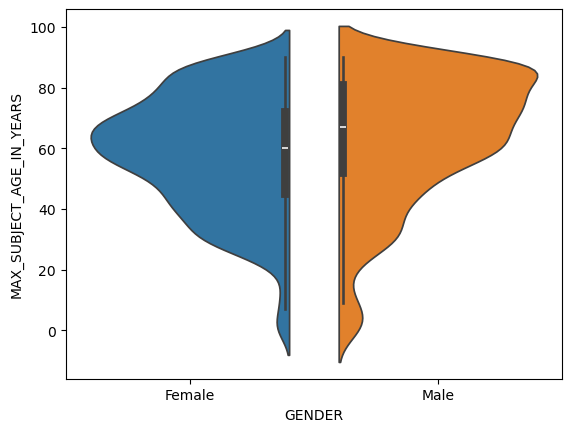

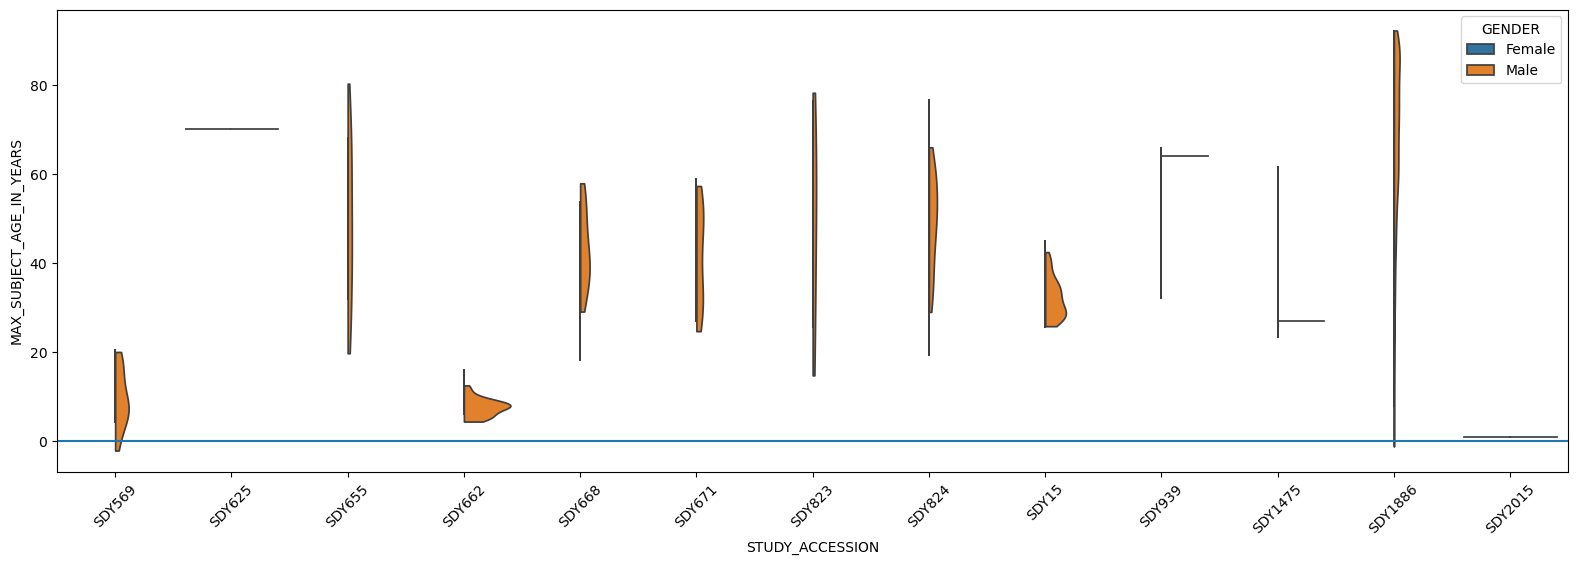

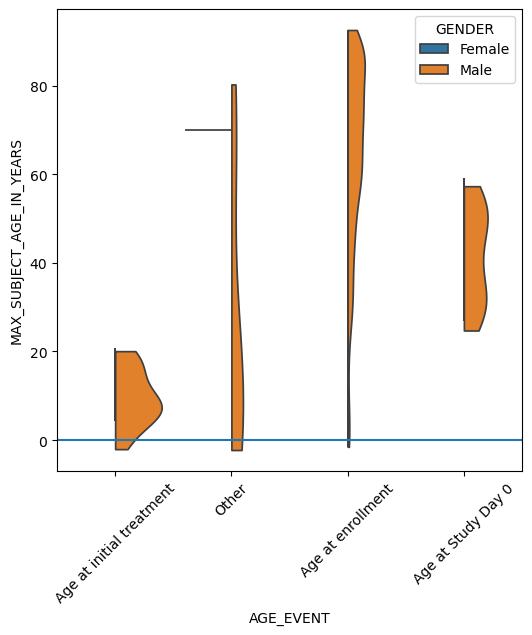

In [23]:
biomarker_study_arm_subject = create_bin_report(biomarker_all_tests, 'Biomarker')
biomarker_study_arm_subject.head()

Directory 'Antigens' created successfully.
Studies for Antigens: 39
Amount of Subjects: 3800
Amount of Subjects no duplicates: 3150
Age event: 5


,Unnamed: 0,ARM_ACCESSION,SUBJECT_ACCESSION,AGE_EVENT,AGE_EVENT_SPECIFY,AGE_UNIT,MAX_SUBJECT_AGE,MIN_SUBJECT_AGE,SUBJECT_PHENOTYPE,SUBJECT_LOCATION,...,SPECIES,STRAIN,STRAIN_CHARACTERISTICS,WORKSPACE_ID_x,DESCRIPTION_y,NAME,STUDY_ACCESSION,TYPE_REPORTED,TYPE_PREFERRED,WORKSPACE_ID_y
13487,13487,ARM2114,SUB116538,Age at Study Day 0,NaN,Years,21.43,21.43,Non-twin,NaN,...,Homo sapiens,NaN,NaN,2883,18-32 year old adults immunized intramuscularl...,TIV group,SDY305,NaN,NaN,2883
13488,13488,ARM2114,SUB116539,Age at Study Day 0,NaN,Years,23.71,23.71,Non-twin,NaN,...,Homo sapiens,NaN,NaN,2883,18-32 year old adults immunized intramuscularl...,TIV group,SDY305,NaN,NaN,2883
13489,13489,ARM2114,SUB116541,Age at Study Day 0,NaN,Years,25.01,25.01,Non-twin,NaN,...,Homo sapiens,NaN,NaN,2883,18-32 year old adults immunized intramuscularl...,TIV group,SDY305,NaN,NaN,2883
13490,13490,ARM2114,SUB116554,Age at Study Day 0,NaN,Years,24.95,24.95,Non-twin,NaN,...,Homo sapiens,NaN,NaN,2883,18-32 year old adults immunized intramuscularl...,TIV group,SDY305,NaN,NaN,2883
13491,13491,ARM2114,SUB116556,Age at Study Day 0,NaN,Years,24.13,24.13,Non-twin,NaN,...,Homo sapiens,NaN,NaN,2883,18-32 year old adults immunized intramuscularl...,TIV group,SDY305,NaN,NaN,2883


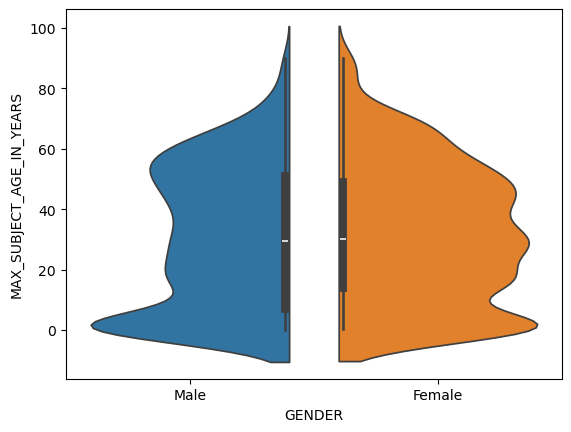

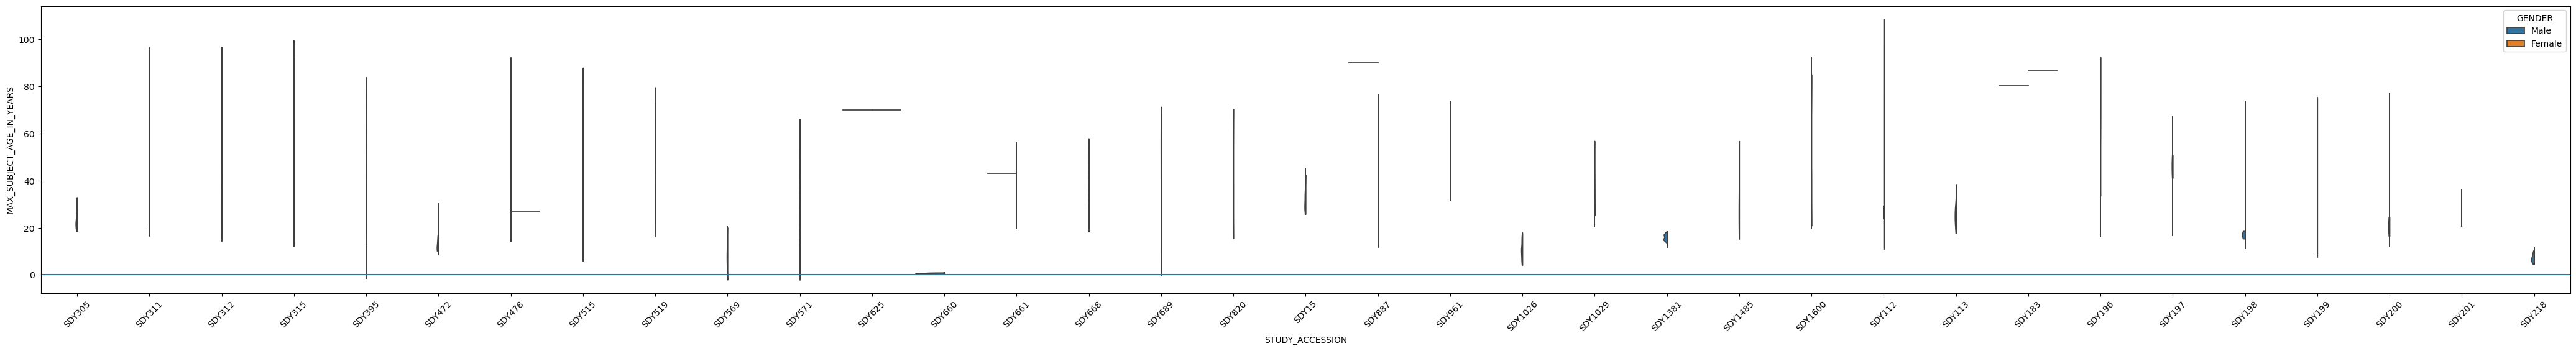

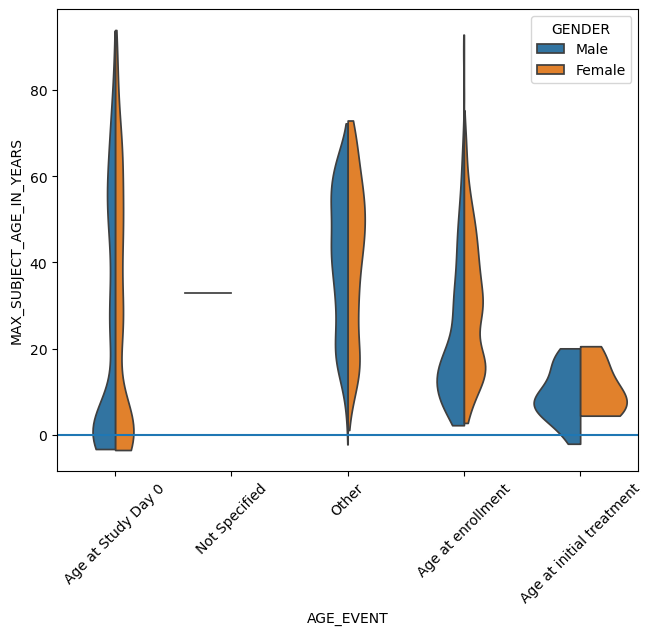

In [24]:
antigen_study_arm_subject = create_bin_report(antigens_all_tests, 'Antigens')
antigen_study_arm_subject.head()

Directory 'Chemistry' created successfully.
Studies for Chemistry: 54
Amount of Subjects: 10833
Amount of Subjects no duplicates: 10597
Age event: 6


,Unnamed: 0,ARM_ACCESSION,SUBJECT_ACCESSION,AGE_EVENT,AGE_EVENT_SPECIFY,AGE_UNIT,MAX_SUBJECT_AGE,MIN_SUBJECT_AGE,SUBJECT_PHENOTYPE,SUBJECT_LOCATION,...,SPECIES,STRAIN,STRAIN_CHARACTERISTICS,WORKSPACE_ID_x,DESCRIPTION_y,NAME,STUDY_ACCESSION,TYPE_REPORTED,TYPE_PREFERRED,WORKSPACE_ID_y
0,0,ARM1,SUB73369,Age at enrollment,NaN,Years,49.0,49.0,Ragweed-induced seasonal allergic rhinitis,NaN,...,Homo sapiens,NaN,NaN,990,"Placebo omalizumab pre-treatment, placebo RIT,...",Placebo Immunotherapy with placebo anti-IgE,SDY1,Placebo Comparator,Placebo Comparator Arm,990
1,1,ARM1,SUB73372,Age at enrollment,NaN,Years,43.0,43.0,Ragweed-induced seasonal allergic rhinitis,NaN,...,Homo sapiens,NaN,NaN,990,"Placebo omalizumab pre-treatment, placebo RIT,...",Placebo Immunotherapy with placebo anti-IgE,SDY1,Placebo Comparator,Placebo Comparator Arm,990
2,2,ARM1,SUB73374,Age at enrollment,NaN,Years,43.0,43.0,Ragweed-induced seasonal allergic rhinitis,NaN,...,Homo sapiens,NaN,NaN,990,"Placebo omalizumab pre-treatment, placebo RIT,...",Placebo Immunotherapy with placebo anti-IgE,SDY1,Placebo Comparator,Placebo Comparator Arm,990
3,3,ARM1,SUB73381,Age at enrollment,NaN,Years,37.0,37.0,Ragweed-induced seasonal allergic rhinitis,NaN,...,Homo sapiens,NaN,NaN,990,"Placebo omalizumab pre-treatment, placebo RIT,...",Placebo Immunotherapy with placebo anti-IgE,SDY1,Placebo Comparator,Placebo Comparator Arm,990
4,4,ARM1,SUB73382,Age at enrollment,NaN,Years,34.0,34.0,Ragweed-induced seasonal allergic rhinitis,NaN,...,Homo sapiens,NaN,NaN,990,"Placebo omalizumab pre-treatment, placebo RIT,...",Placebo Immunotherapy with placebo anti-IgE,SDY1,Placebo Comparator,Placebo Comparator Arm,990


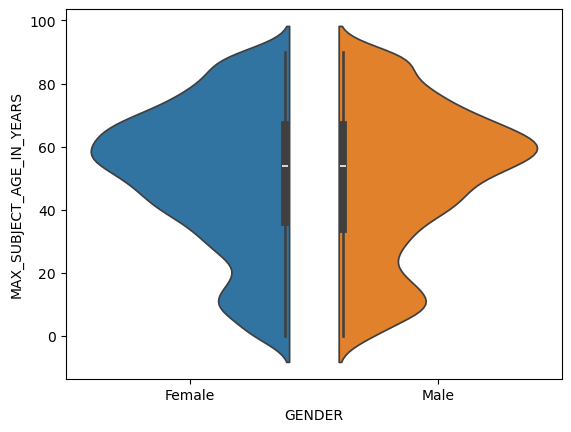

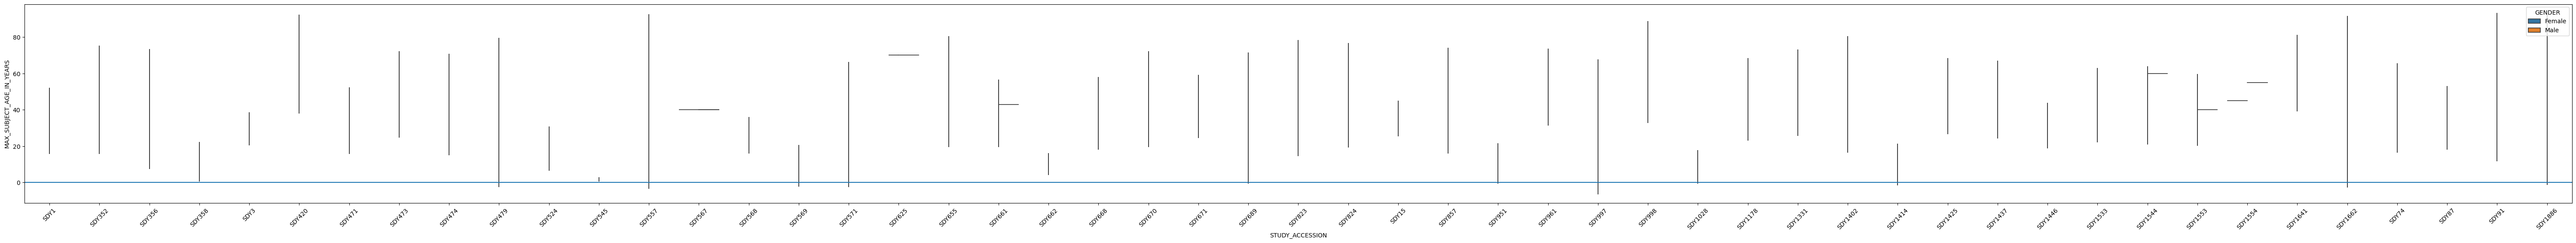

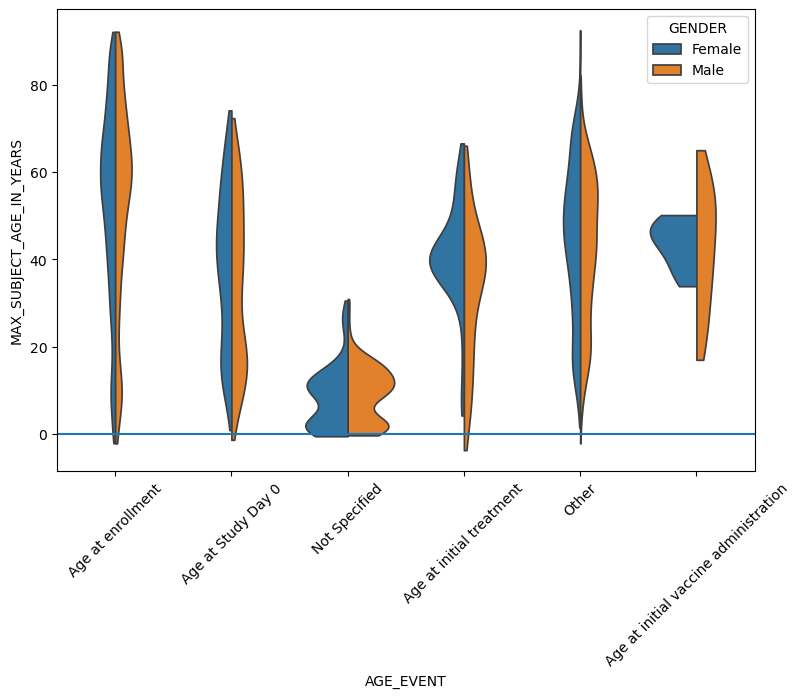

In [26]:
chemistry_study_arm_subject = create_bin_report(chemistry_all_tests, 'Chemistry')
chemistry_study_arm_subject.head()

Directory 'Fasting' created successfully.
Studies for Fasting: 15
Amount of Subjects: 2539
Amount of Subjects no duplicates: 2539
Age event: 3


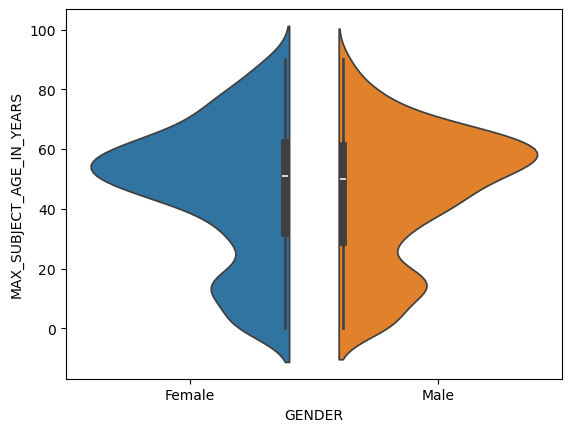

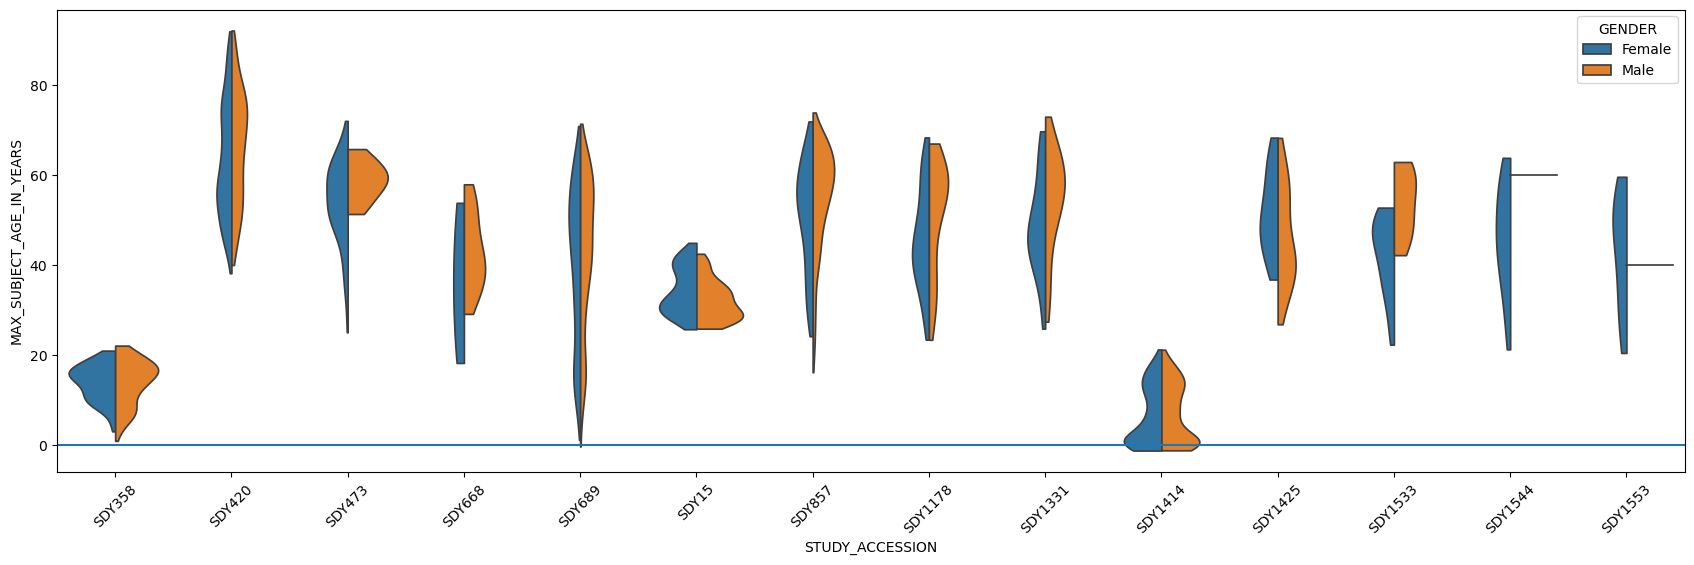

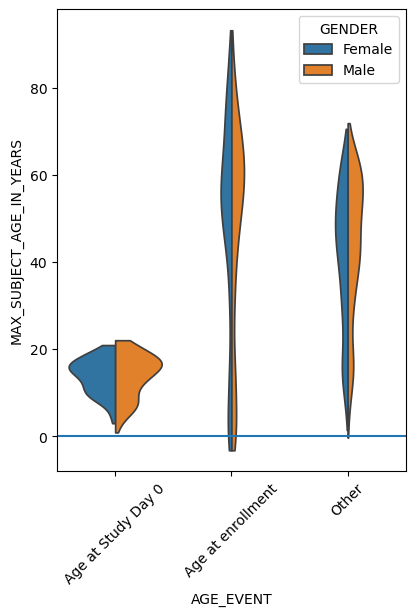

In [28]:
fasting_study_arm_subject = create_bin_report(fasting_all_tests, 'Fasting')


Directory 'CellTypes' created successfully.
Studies for CellTypes: 77
Amount of Subjects: 14363
Amount of Subjects no duplicates: 13924
Age event: 6


,Unnamed: 0,ARM_ACCESSION,SUBJECT_ACCESSION,AGE_EVENT,AGE_EVENT_SPECIFY,AGE_UNIT,MAX_SUBJECT_AGE,MIN_SUBJECT_AGE,SUBJECT_PHENOTYPE,SUBJECT_LOCATION,...,SPECIES,STRAIN,STRAIN_CHARACTERISTICS,WORKSPACE_ID_x,DESCRIPTION_y,NAME,STUDY_ACCESSION,TYPE_REPORTED,TYPE_PREFERRED,WORKSPACE_ID_y
0,0,ARM1,SUB73369,Age at enrollment,NaN,Years,49.0,49.0,Ragweed-induced seasonal allergic rhinitis,NaN,...,Homo sapiens,NaN,NaN,990,"Placebo omalizumab pre-treatment, placebo RIT,...",Placebo Immunotherapy with placebo anti-IgE,SDY1,Placebo Comparator,Placebo Comparator Arm,990
1,1,ARM1,SUB73372,Age at enrollment,NaN,Years,43.0,43.0,Ragweed-induced seasonal allergic rhinitis,NaN,...,Homo sapiens,NaN,NaN,990,"Placebo omalizumab pre-treatment, placebo RIT,...",Placebo Immunotherapy with placebo anti-IgE,SDY1,Placebo Comparator,Placebo Comparator Arm,990
2,2,ARM1,SUB73374,Age at enrollment,NaN,Years,43.0,43.0,Ragweed-induced seasonal allergic rhinitis,NaN,...,Homo sapiens,NaN,NaN,990,"Placebo omalizumab pre-treatment, placebo RIT,...",Placebo Immunotherapy with placebo anti-IgE,SDY1,Placebo Comparator,Placebo Comparator Arm,990
3,3,ARM1,SUB73381,Age at enrollment,NaN,Years,37.0,37.0,Ragweed-induced seasonal allergic rhinitis,NaN,...,Homo sapiens,NaN,NaN,990,"Placebo omalizumab pre-treatment, placebo RIT,...",Placebo Immunotherapy with placebo anti-IgE,SDY1,Placebo Comparator,Placebo Comparator Arm,990
4,4,ARM1,SUB73382,Age at enrollment,NaN,Years,34.0,34.0,Ragweed-induced seasonal allergic rhinitis,NaN,...,Homo sapiens,NaN,NaN,990,"Placebo omalizumab pre-treatment, placebo RIT,...",Placebo Immunotherapy with placebo anti-IgE,SDY1,Placebo Comparator,Placebo Comparator Arm,990


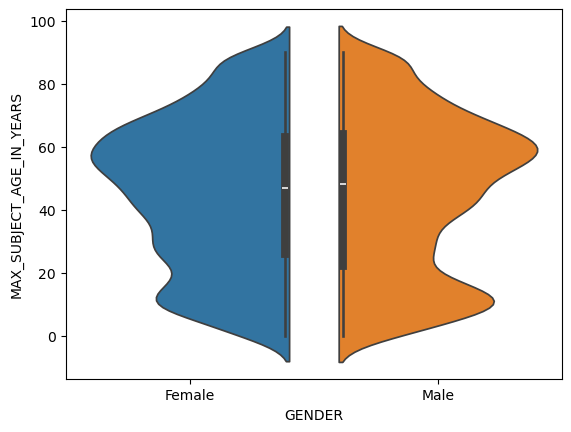

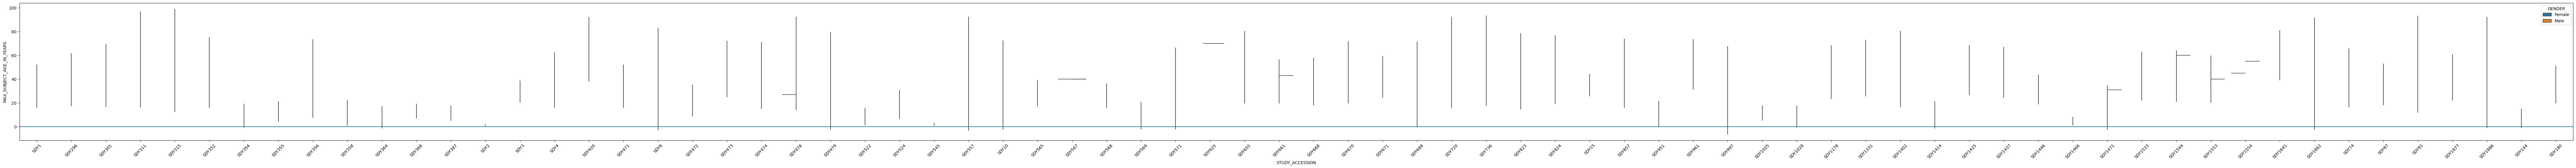

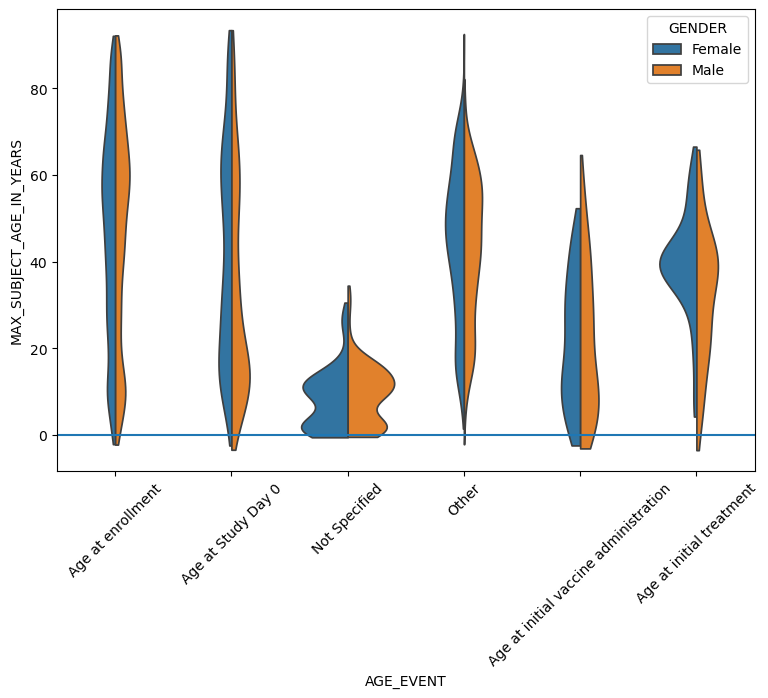

In [27]:
cell_types_study_arm_subject = create_bin_report(cell_types_all_tests, 'CellTypes')
cell_types_study_arm_subject.head()